In [22]:
#Clustering algorithm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#to load data
df = pd.read_csv("Mall_Customers.csv")df.ddf.desc

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Score'}>,
        <Axes: title={'center': 'Gender'}>]], dtype=object)

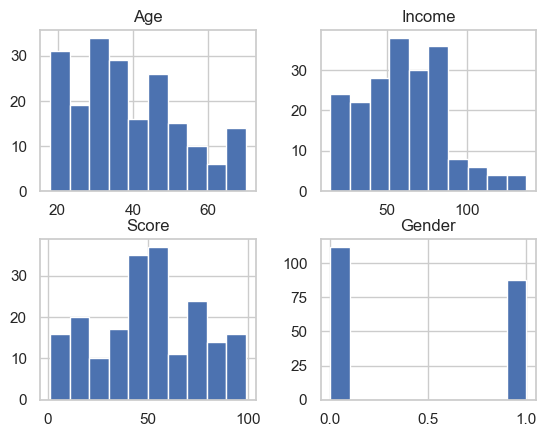

In [26]:
df.hist()

In [8]:
#Data preprocessing
#Rename columns
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
}, inplace=True)
#drop unwanted colums
df.drop(columns='CustomerID', inplace=True)


In [14]:
#Encode Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Genre'])
#Features for clustering
x = df[['Income','Score']]

In [16]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(x,test_size=0.2,random_state=42)

C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rutuj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (Train): 0.5502062330283519
Silhouette Score (Test): 0.5664167179616192


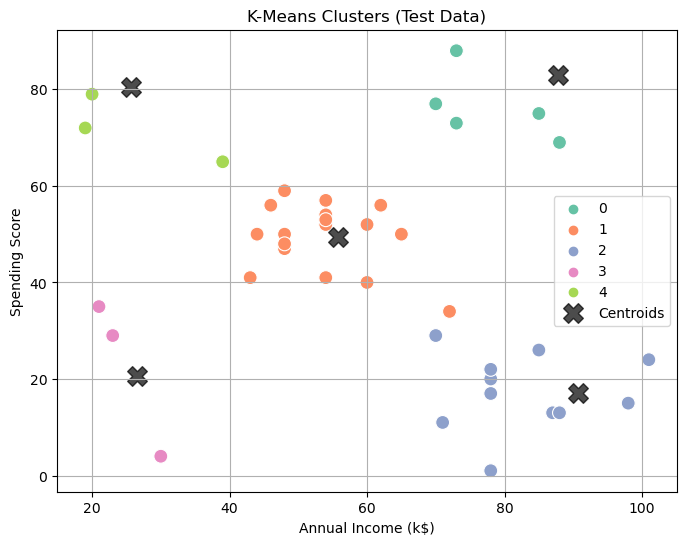

In [21]:
#K-mean clustering algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_train)

# Predict cluster labels
train_labels_kmeans = kmeans.predict(x_train)
test_labels_kmeans = kmeans.predict(x_test)

# Evaluate using Silhouette Score
from sklearn.metrics import silhouette_score
train_score = silhouette_score(x_train, train_labels_kmeans)
test_score = silhouette_score(x_test, test_labels_kmeans)

print("Silhouette Score (Train):", train_score)
print("Silhouette Score (Test):", test_score)

# Plot clusters for test data
import matplotlib.pyplot as plt
import seaborn as sns

x_test_copy = x_test.copy()
x_test_copy['Cluster'] = test_labels_kmeans

plt.figure(figsize=(8,6))
sns.scatterplot(data=x_test_copy, x='Income', y='Score', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clusters (Test Data)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, label='Centroids', marker='X')
plt.legend()
plt.grid(True)
plt.show()



Agglomerative Clustering Silhouette Score (Train): 0.5446226502499154
Agglomerative Clustering Silhouette Score (Test): 0.608066288066554


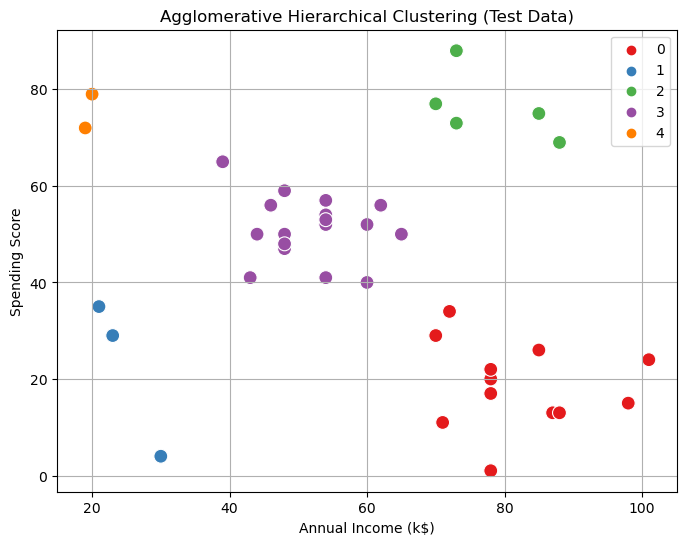

In [23]:
#Agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
train_labels_agg = agg_cluster.fit_predict(x_train)
test_labels_agg = agg_cluster.fit_predict(x_test)  # Note: doesn't support .predict()

# Evaluate using silhouette score
train_score_agg = silhouette_score(x_train, train_labels_agg)
test_score_agg = silhouette_score(x_test, test_labels_agg)

print("Agglomerative Clustering Silhouette Score (Train):", train_score_agg)
print("Agglomerative Clustering Silhouette Score (Test):", test_score_agg)

# Visualize the clustering (on test set)
x_test_copy = x_test.copy()
x_test_copy['Cluster'] = test_labels_agg

plt.figure(figsize=(8, 6))
sns.scatterplot(data=x_test_copy, x='Income', y='Score', hue='Cluster', palette='Set1', s=100)
plt.title('Agglomerative Hierarchical Clustering (Test Data)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()


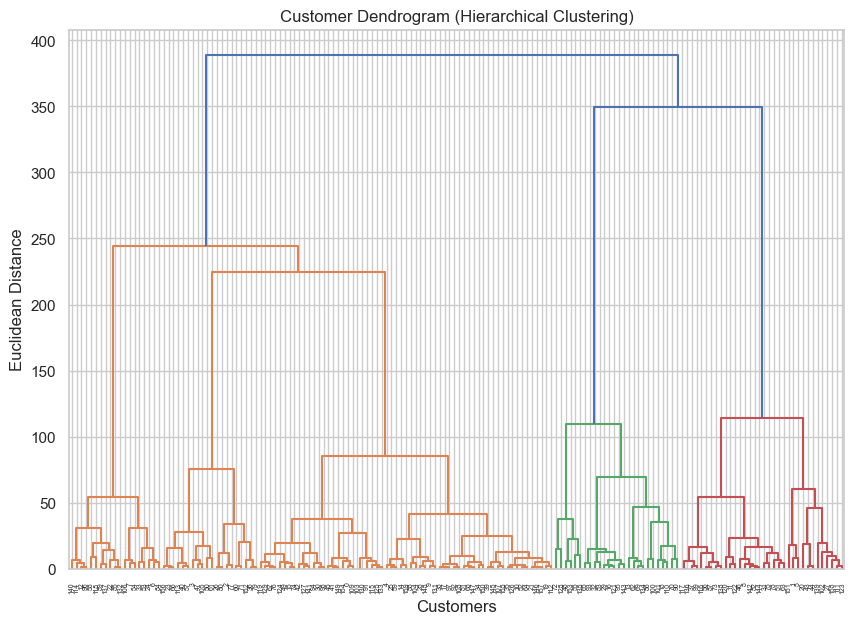

In [25]:
#To plot Dendrograms 
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Use a sample or the whole dataset for clarity
# We'll use the full x_train here
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram (Hierarchical Clustering)")
dendrogram = sch.dendrogram(sch.linkage(x_train, method='ward'))
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()